In [1]:
import pandas as pd

In [2]:
data_size = 6517
data = pd.read_csv(f"clean_data_{data_size}.csv")

In [3]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["price", "city", "state","price_cat"]),
    data["price_cat"],
    test_size=0.2,
    random_state=42,
)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [9]:
# Generate prediction
y_pred = neigh.predict(X_test)

# evaluate model 
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.5805214723926381

In [12]:
y_test.value_counts()

price_cat
1    559
2    516
3    229
Name: count, dtype: int64

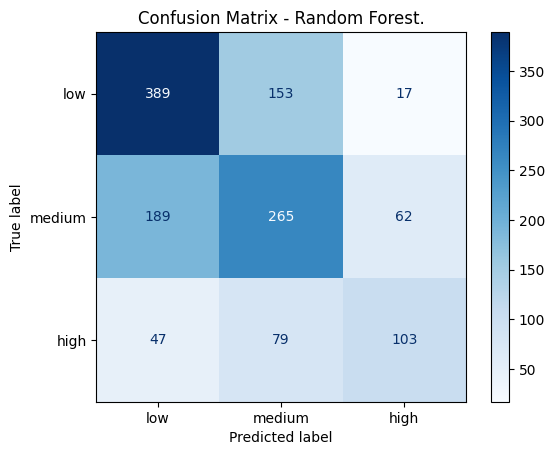

Summary for the classifier Random Forest with accuracy 0.58
              precision    recall  f1-score   support

           1       0.62      0.70      0.66       559
           2       0.53      0.51      0.52       516
           3       0.57      0.45      0.50       229

    accuracy                           0.58      1304
   macro avg       0.57      0.55      0.56      1304
weighted avg       0.58      0.58      0.58      1304



In [11]:
# Confusion Matrix ========================================
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "medium", "high"])
disp.plot(cmap=plt.cm.Blues, xticks_rotation= "horizontal")
plt.title(f"Confusion Matrix - Random Forest.")
plt.show()

# metrics =================================================
print(f"Summary for the classifier Random Forest with accuracy {metrics.accuracy_score(y_test, y_pred):.2f}")
print(metrics.classification_report(y_test, y_pred))

In [13]:
# Do a regression logist models for 3 labels
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)


/home/gabriel/Documents/ufc/ciencia de dados/house_price/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


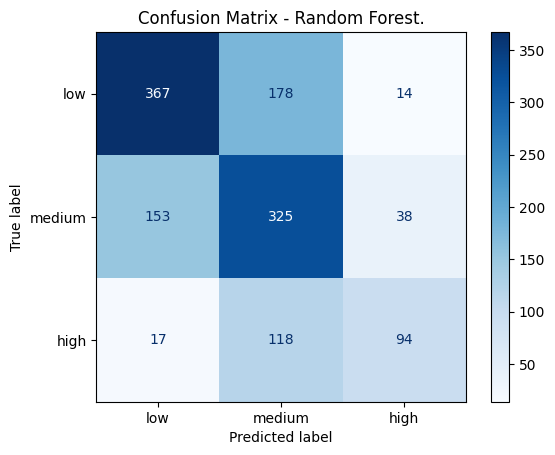

Summary for the classifier Random Forest with accuracy 0.60
              precision    recall  f1-score   support

           1       0.68      0.66      0.67       559
           2       0.52      0.63      0.57       516
           3       0.64      0.41      0.50       229

    accuracy                           0.60      1304
   macro avg       0.62      0.57      0.58      1304
weighted avg       0.61      0.60      0.60      1304



In [14]:
# Confusion Matrix ========================================
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "medium", "high"])
disp.plot(cmap=plt.cm.Blues, xticks_rotation= "horizontal")
plt.title(f"Confusion Matrix - Random Forest.")
plt.show()

# metrics =================================================
print(f"Summary for the classifier Random Forest with accuracy {metrics.accuracy_score(y_test, y_pred):.2f}")
print(metrics.classification_report(y_test, y_pred))